In [3]:
import pandas as pd
import spacy

In [1]:
%store -r w2v_model
# from word2vec.ipynb

In [4]:
arguments=pd.read_csv("arguments-test.tsv", sep='\t')

In [5]:
labels=pd.read_csv("labels-test.tsv", sep='\t')

In [6]:
# check for duplicate rows
duplicate_rows=arguments.duplicated().sum()
print(duplicate_rows)

0


In [9]:
# concatenate the two sets
test_set = pd.concat([arguments, labels], axis=1)

In [8]:
# load the English language model
nlp = spacy.load("en_core_web_sm")

In [10]:
def preprocess_text(text):
    doc = nlp(text)
    # set lowercase
    processed_text = [token.text.lower()for token in doc]
    return processed_text

In [13]:
# we pre-process the arguments with spacy
test_set["premise_tokenized"] = test_set["Premise"].apply(preprocess_text)
test_set.head()

,Argument ID,Conclusion,Stance,Premise,Argument ID,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,...,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity,premise_tokenized
0,A26004,We should end affirmative action,against,affirmative action helps with employment equity.,A26004,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,"[affirmative, action, helps, with, employment,..."
1,A26010,We should end affirmative action,in favor of,affirmative action can be considered discrimin...,A26010,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,"[affirmative, action, can, be, considered, dis..."
2,A26016,We should ban naturopathy,in favor of,naturopathy is very dangerous for the most vul...,A26016,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,"[naturopathy, is, very, dangerous, for, the, m..."
3,A26024,We should prohibit women in combat,in favor of,women shouldn't be in combat because they aren...,A26024,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,"[women, should, n't, be, in, combat, because, ..."
4,A26026,We should ban naturopathy,in favor of,once eradicated illnesses are returning due to...,A26026,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,"[once, eradicated, illnesses, are, returning, ..."


In [14]:
# we generalize labels according to the following dictionary
general_dictionary={
    "Self-direction: thought":"Openness to change",
    "Self-direction: action":"Openness to change",
    "Stimulation":"Openness to change",
    "Hedonism":"Openness to change",
    "Achievement":"Self-Enhancement",
    "Power: dominance":"Self-Enhancement",
    "Power: resources":"Self-Enhancement",
    "Face":"Self-Enhancement",
    "Security: personal":"Conservation",
    "Security: societal":"Conservation",
    "Tradition":"Conservation",
    "Conformity: rules":"Conservation",
    "Conformity: interpersonal":"Conservation",
    "Humility":"Conservation",
    "Benevolence: caring":"Self-Transcendence",
    "Benevolence: dependability":"Self-Transcendence",
    "Universalism: concern":"Self-Transcendence",
    "Universalism: nature":"Self-Transcendence",
    "Universalism: tolerance":"Self-Transcendence",
    "Universalism: objectivity":"Self-Transcendence"
    
}

In [15]:
test_set["Openness to change"]=test_set["Self-direction: thought"]+test_set["Self-direction: action"]+test_set["Stimulation"]+test_set["Hedonism"]

In [16]:
test_set["Self-Enhancement"]=test_set["Achievement"]+test_set["Power: dominance"]+test_set["Power: resources"]+test_set["Face"]

In [17]:
test_set["Conservation"]=test_set["Security: personal"]+test_set["Security: societal"]+test_set["Tradition"]+test_set["Conformity: rules"]+test_set["Conformity: interpersonal"]+test_set["Humility"]

In [18]:
test_set["Self-Transcendence"]=test_set["Benevolence: caring"]+test_set["Benevolence: dependability"]+test_set["Universalism: concern"]+test_set["Universalism: nature"]+test_set["Universalism: tolerance"]+test_set["Universalism: objectivity"]

In [19]:
# we now drop the original features
for key in general_dictionary:
    if key!=general_dictionary[key]:
        test_set=test_set.drop(key, axis=1)
    else:
        pass

In [20]:
# extract the generalized label columns and store them in a separate DataFrame
label_columns=test_set[[
"Openness to change",
"Self-Enhancement",
"Conservation",
"Self-Transcendence"]]

# convert the label columns to a multi-class format (one-hot encoding)
test_set['general_label'] = label_columns.apply(lambda row: row.to_list(), axis=1)
test_set

,Argument ID,Conclusion,Stance,Premise,Argument ID,premise_tokenized,Openness to change,Self-Enhancement,Conservation,Self-Transcendence,general_label
0,A26004,We should end affirmative action,against,affirmative action helps with employment equity.,A26004,"[affirmative, action, helps, with, employment,...",0,1,1,2,"[0, 1, 1, 2]"
1,A26010,We should end affirmative action,in favor of,affirmative action can be considered discrimin...,A26010,"[affirmative, action, can, be, considered, dis...",0,1,0,3,"[0, 1, 0, 3]"
2,A26016,We should ban naturopathy,in favor of,naturopathy is very dangerous for the most vul...,A26016,"[naturopathy, is, very, dangerous, for, the, m...",0,1,1,2,"[0, 1, 1, 2]"
3,A26024,We should prohibit women in combat,in favor of,women shouldn't be in combat because they aren...,A26024,"[women, should, n't, be, in, combat, because, ...",0,1,0,0,"[0, 1, 0, 0]"
4,A26026,We should ban naturopathy,in favor of,once eradicated illnesses are returning due to...,A26026,"[once, eradicated, illnesses, are, returning, ...",0,1,2,2,"[0, 1, 2, 2]"
...,...,...,...,...,...,...,...,...,...,...,...
1571,E07272,We should end mass migration together.,in favor of,Mass migration is a phenomenon that causes dam...,E07272,"[mass, migration, is, a, phenomenon, that, cau...",0,0,1,0,"[0, 0, 1, 0]"
1572,E07273,We should end mass migration together.,in favor of,Mass migration hurts the migrants themselves i...,E07273,"[mass, migration, hurts, the, migrants, themse...",0,0,1,2,"[0, 0, 1, 2]"
1573,E07275,We should consider Russian interests in the EU...,in favor of,It is neither in the interests of the EU nor R...,E07275,"[it, is, neither, in, the, interests, of, the,...",1,1,1,2,"[1, 1, 1, 2]"
1574,E07280,We should adopt an extension of the applicatio...,in favor of,Foreign Policy at the EU level should be based...,E07280,"[foreign, policy, at, the, eu, level, should, ...",1,1,0,2,"[1, 1, 0, 2]"


In [21]:
# tranform the labels in binary encoding
binary_labels = []

for label in test_set["general_label"]:
    new_label = []

    for value in label:
        if value > 0:
            new_label.append(1)
        else:
            new_label.append(0)

    binary_labels.append(new_label)

In [22]:
import numpy as np

In [23]:
# create the vectors from the w2v model for the validation set
test_w2v_vectors = []
for arg in test_set["premise_tokenized"]:
    seq = []

    for word in arg:
        if word in w2v_model.wv:
            seq.append(w2v_model.wv[word])
        else:
            seq.append(np.zeros(150)) #if the word is not in the model i append an array of zeros equal to the embeddings dimension, that is 150
        
    test_w2v_vectors.append(seq)

In [24]:
test_w2v_vectors = [np.array(arg) for arg in test_w2v_vectors]

In [26]:
y_test = np.array(binary_labels)

We can now go on with the training of the model

In [27]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM
from keras.datasets import imdb
from keras.utils import pad_sequences

In [28]:
%store -r input_w2v
# from undersampling_w2v.ipynb

In [29]:
%store -r w2v_df_labels
# from undersampling_w2v.ipynb

In [30]:
%store -r y_val
# from preprocessing_validation.ipynb

In [31]:
%store -r val_w2v_vectors
# from preprocessing_validation.ipynb

In [33]:
# this max_len variable will help pad the train and validation set and test set
max_len_val = max(len(arg) for arg in val_w2v_vectors)
max_len_train = max(len(arg) for arg in input_w2v)
max_len_test = max(len(arg) for arg in test_w2v_vectors)  
print(max_len_val, max_len_train, max_len_test)

163 147 163


In [34]:
# we choose the highest max_len so that we don't lose information
max_len = 163

In [35]:
# we pad the train and validation set and create the labels for training
X_train = pad_sequences(input_w2v, maxlen=max_len)
X_val = pad_sequences(val_w2v_vectors, max_len)
X_test = pad_sequences(test_w2v_vectors, max_len)
train_labels = [row.labels for id, row in df.iterrows()]

In [38]:
# to implement our classification problem (that is multi-class and multi-label) we will use binary crossentropy with a sigmoid activation
# function in the last layer: now we transform pur probabilities labels in "binary" labels.
y_train = []
for label in train_labels:
    new_label = []
    for value in label:
        if value > 0:
            new_label.append(1)
        else:
            new_label.append(0)
    y_train.append(new_label)

In [39]:
# we tranform our y_train in an array
y_train = np.array(y_train)

In [40]:
# we make sure the train, test and validation set have the same embedding dimension and we set it as the variable "emb_len"
print(len(X_train[0][0]), len(X_val[0][0]), len(X_test[0][0]))
emb_len = len(X_val[0][0])

150 150 150


In [43]:
# using early stopping to make sure we don't overfit the small dataset
from keras.callbacks import EarlyStopping

In [41]:
from keras.callbacks import LearningRateScheduler

In [42]:
import tensorflow as tf

In [46]:
# we first define a function that will be a scheduler and will permit to our learning rate to decrease over epochs
def scheduler(epoch, lr):
    if epoch < 6:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [47]:
best_params = {'batch': 64, 'dropout': 0.7, 'optimizer': 'adam'}

initial_lr = 0.001  # the default starting learning rate for Adam

patience = 10  

# the learning rate scheduler takes as input a function that returns the desired learning rate for a given epoch
lr_scheduler = LearningRateScheduler(lambda epoch: scheduler(epoch, initial_lr)) 
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, verbose=1, restore_best_weights=True)

threshold = 0.5

model = Sequential()
model.add(LSTM(100, dropout=best_params["dropout"], return_sequences=True, recurrent_dropout= best_params["dropout"], input_shape = (max_len, emb_len), activation="relu"))
model.add(Dropout(best_params["dropout"]))
model.add(LSTM(50, dropout=best_params["dropout"], recurrent_dropout=best_params["dropout"], activation="relu"))
model.add(Dropout(best_params["dropout"]))
model.add(Dense(4, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=best_params["optimizer"], metrics=['accuracy'])

history = model.fit(X_train, y_train,
        epochs=50,
        validation_data=(X_val, y_val),
        batch_size=best_params["batch"],
        verbose=1,
        callbacks=[early_stopping, lr_scheduler])

y_pred_probs = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred_probs > threshold).astype(int)

# Print classification report
print(classification_report(y_test, y_pred_binary))

Epoch 1/50


44/44 [==============================] - 41s 763ms/step - loss: 0.7100 - accuracy: 0.1964 - val_loss: 0.6826 - val_accuracy: 0.3058 - lr: 0.0010
Epoch 2/50
44/44 [==============================] - 29s 672ms/step - loss: 0.6700 - accuracy: 0.1520 - val_loss: 0.6816 - val_accuracy: 0.3008 - lr: 0.0010
Epoch 3/50
44/44 [==============================] - 38s 872ms/step - loss: 0.6680 - accuracy: 0.1368 - val_loss: 0.6795 - val_accuracy: 0.2893 - lr: 0.0010
Epoch 4/50
44/44 [==============================] - 37s 851ms/step - loss: 0.6588 - accuracy: 0.1224 - val_loss: 0.6769 - val_accuracy: 0.3109 - lr: 0.0010
Epoch 5/50
44/44 [==============================] - 38s 858ms/step - loss: 0.6547 - accuracy: 0.1394 - val_loss: 0.6743 - val_accuracy: 0.3058 - lr: 0.0010
Epoch 6/50
44/44 [==============================] - 39s 881ms/step - loss: 0.6570 - accuracy: 0.1173 - val_loss: 0.6748 - val_accuracy: 0.2976 - lr: 0.0010
Epoch 7/50
44/44 [==============================] - 39s 883ms/

In [49]:
import matplotlib.pyplot as plt

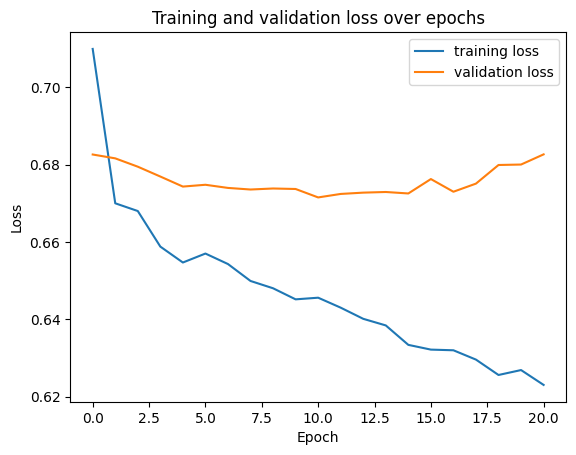

In [50]:
#plot training loss and validation loss
plt.plot(history.history["loss"], label = "training loss")
plt.plot(history.history["val_loss"], label = "validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and validation loss over epochs")
plt.legend()
plt.show()